In [1]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D, Dropout, Flatten, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Splitting into training and testing data
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()
input_shape = (28,28,1)# input_shape is defined as (28, 28, 1) to represent the dimensions of the input images.

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Making sure that the values are float so that we can getdecimal points after division
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
#The code reshapes the training and testing data to ensure it's in the format expected by the neural network.
#It adds an extra dimension (1) to represent grayscale images.

In [4]:
# print("Data type of x_train:", x_train.dtype)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# print("Data type after converting to float:", x_train.dtype)
# The pixel values of the images are converted to float32 to work with decimal values in the subsequent calculations.

In [5]:
# Normalizing the RGB codes by divinding it into the max RGB value.
x_train = x_train / 255
x_test = x_test / 255
#The pixel values are normalized by dividing them by 255, ensuring that they are within the range [0, 1].
print("Shape of training : ", x_train.shape)
print("Shape of testing : ", x_test.shape)
#The print statements provide information about the shapes of the training and testing datasets.

Shape of training :  (60000, 28, 28, 1)
Shape of testing :  (10000, 28, 28, 1)


In [6]:
# b. Defining the model’s architecture
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
## The model starts with a convolutional layer (Conv2D) with 28 filters and a 3x3 kernel, taking the specified input shape.
model.add(MaxPooling2D(pool_size=(2,2)))# A max-pooling layer (MaxPooling2D) follows with a 2x2 pool size.
model.add(Flatten())#The Flatten layer reshapes the output to a 1D vector.
model.add(Dense(200,activation = "relu"))#There's a fully connected layer (Dense) with 200 neurons and a ReLU activation function.
model.add(Dropout(0.3))# A dropout layer is added to prevent overfitting.

model.add(Dense(10,activation = "softmax"))
model.summary()
# The output layer is another Dense layer with 10 neurons and a softmax activation, representing the 10 digit classes.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 200)               946600    
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2010      
                                                        

In [7]:
# c. Training the model
model.compile(optimizer="adam",
loss="sparse_categorical_crossentropy",metrics=['accuracy'])
# The code compiles the model with the Adam optimizer, sparse categorical cross-entropy as the loss function, and accuracy as
#the metric to monitor.
model.fit(x_train,y_train,epochs=2)#It then trains the model on the training data for 2 epochs.


Epoch 1/2
1875/1875 [==============================] - 58s 31ms/step - loss: 0.2002 - accuracy: 0.9402
Epoch 2/2
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0827 - accuracy: 0.9748


In [8]:
# d. Estimating the model’s performance
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)
# The code evaluates the trained model on the testing data and prints the loss and accuracy results.

313/313 [==============================] - 4s 12ms/step - loss: 0.0584 - accuracy: 0.9813
Loss=0.058
Accuracy=0.981


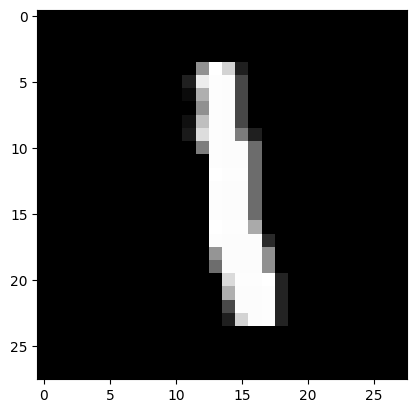

In [9]:
# Showing image at positions[] from dataset:
image = x_train[6]# This code displays an image from the training dataset, specifically the image at position 6.
plt.imshow(np.squeeze(image), cmap='gray')
plt.show()#The image is shown in grayscale using plt.imshow.

In [10]:
# Predicting the class of image :
image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
# The code reshapes the image to match the expected input shape.
predict_model = model.predict([image])
print("Predicted class {}:" .format(np.argmax(predict_model)))
# t then uses the trained model to predict the class of the image and prints the predicted class, which is the digit it recognizes.

1/1 [==============================] - 0s 98ms/step
Predicted class 1:
